In [4]:
import torch
print("cuda available. Running on GPU." if torch.cuda.is_available() else "cuda not available. Running on CPU.")
import numpy as np
import os
import matplotlib.pyplot as plt
from Core.helpers import to_torch,to_numpy
from Core.DataLoader import GoalCalibrationDataset
from utils import DATA_DIR

cuda available. Running on GPU.


In [6]:
def target_to_keypoints(target_dict):
    return target_dict['keypoints'][:,:2]
def batch_target_to_keypoints(batch_target_dict):
    batch_keypoints = []
    for item in batch_target_dict['keypoints']:
        batch_keypoints.append(item[:,:2])
    return batch_keypoints
    
# # plot images and corresponding keypoints for a subset of the batch
def plot_batch_keypoints(batch,figsize=(10,10)):
    imgs,targets = batch
    keypoints = batch_target_to_keypoints(targets)

    # loop to plot all images and their keypoints
    if len(imgs) >= 9:
        fig,axes = plt.subplots(ncols=3,nrows=3,figsize=figsize)
        # choose random subset of images and keypoints
        choices = torch.randperm(len(imgs))[:9]
        imgs = imgs[choices]
        keypoints = [keypoints[i] for i in choices]
    else:
        fig,axes = plt.subplots(ncols=len(imgs),nrows=1,figsize=figsize)

    for i,ax in enumerate(np.ravel(axes)):
        ax.imshow(to_numpy(imgs[i]))
        ax.plot(*keypoints[i].T,'r.')
        ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [7]:
# initialize an instance of the dataloader
GoalData = GoalCalibrationDataset(DATA_DIR)
# put dataloader into pytorch dataloader function
from torch.utils.data import DataLoader
# batch size chosen to be 14 as it 854 is divisible by this
trainloader = DataLoader(GoalData,batch_size=10,shuffle=False)
# get an example of the data for plotting
# img0,target0 = GoalData.__getitem__(10)
batch = next(iter(trainloader))
img0,target0 = batch

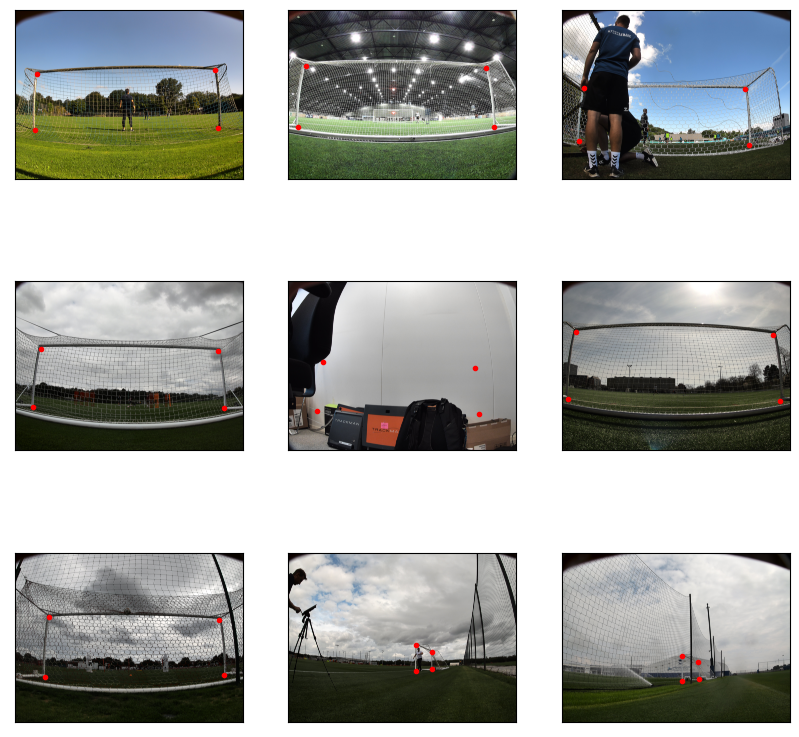

In [8]:
plot_batch_keypoints(batch,figsize=(10,10))

In [24]:
from torchvision.models.detection import keypointrcnn_resnet50_fpn, KeypointRCNN_ResNet50_FPN_Weights
from torchvision.io import read_image



# goal_int = read_image(r"C:\Users\Nikolaj\OneDrive - Danmarks Tekniske Universitet\DTU\Kandidat\MasterThesis\Code\GoalCornerDetection\Data\0a3a86a0-5a22-4b8c-b066-1ee332d023b0\0a3a86a0-5a22-4b8c-b066-1ee332d023b0.jpg")
# goal_int = read_image(r"C:\Users\Nikolaj\OneDrive - Danmarks Tekniske Universitet\Pictures\Camera Roll\Screenshot_20191026-212902.jpg")
# goal_int = read_image(r"C:\Users\Nikolaj\OneDrive - Danmarks Tekniske Universitet\Pictures\Camera Roll\IMG_20191005_131653.jpg")
# goal_int = read_image(r"C:\Users\Nikolaj\OneDrive - Danmarks Tekniske Universitet\Pictures\Camera Roll\IMG_20191002_141521.jpg")
# goal_int = read_image(r"C:\Users\Nikolaj\OneDrive - Danmarks Tekniske Universitet\Pictures\Camera Roll\IMG_20190928_052132.jpg") # upside down for some reason
# goal_int = read_image(r"C:\Users\Nikolaj\OneDrive - Danmarks Tekniske Universitet\Pictures\Camera Roll\IMG_20190927_095644.jpg") # also upside down
goal_int = read_image(r"C:\Users\Nikolaj\OneDrive - Danmarks Tekniske Universitet\Pictures\Camera Roll\IMG_20190913_154140.jpg")

weights = KeypointRCNN_ResNet50_FPN_Weights.DEFAULT
transforms = weights.transforms()

goal_float = transforms(goal_int)

model = keypointrcnn_resnet50_fpn(weights=weights, progress=False)
model = model.eval()

outputs = model([goal_float])
print(f'outputs:\n{outputs}')

outputs:
[{'boxes': tensor([[ 980.7842, 1280.2295, 1489.1094, 2488.2061],
        [2440.1228, 1235.9971, 2803.2737, 2562.8196],
        [2170.9617, 1321.6495, 2535.8655, 2513.8994],
        [1882.9669, 1330.5883, 2235.0315, 2441.6409],
        [1645.4933, 1345.0524, 1944.7428, 2459.4211],
        [1428.1930, 1397.3473, 1683.7765, 2457.5283],
        [2783.1003, 1749.4574, 2830.1545, 1867.4496],
        [3224.7917,  424.8434, 3742.1504, 1504.3329],
        [1473.8275, 1341.9458, 1829.1051, 2474.5125],
        [2854.0750, 1360.2992, 2897.2458, 1481.5121],
        [ 560.7571, 1277.5414,  618.7313, 1430.7365],
        [2998.0505, 1344.7825, 3034.8096, 1464.7482],
        [2774.1030, 1735.1832, 2828.9055, 1935.2531]],
       grad_fn=<StackBackward0>), 'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 'scores': tensor([0.9998, 0.9994, 0.9990, 0.9987, 0.9983, 0.9981, 0.5725, 0.1925, 0.1919,
        0.1794, 0.1222, 0.0779, 0.0730], grad_fn=<IndexBackward0>), 'keypoints': tensor([[[1.3

In [25]:
print(len(outputs))
print(outputs[0].keys())
outputs[0]['scores']

1
dict_keys(['boxes', 'labels', 'scores', 'keypoints', 'keypoints_scores'])


tensor([0.9998, 0.9994, 0.9990, 0.9987, 0.9983, 0.9981, 0.5725, 0.1925, 0.1919,
        0.1794, 0.1222, 0.0779, 0.0730], grad_fn=<IndexBackward0>)

In [26]:
kpts = outputs[0]['keypoints']
scores = outputs[0]['scores']

print(kpts)
print(scores)

tensor([[[1.3639e+03, 1.3909e+03, 1.0000e+00],
         [1.3901e+03, 1.3759e+03, 1.0000e+00],
         [1.3415e+03, 1.3721e+03, 1.0000e+00],
         [1.4162e+03, 1.3909e+03, 1.0000e+00],
         [1.3078e+03, 1.3834e+03, 1.0000e+00],
         [1.4349e+03, 1.5222e+03, 1.0000e+00],
         [1.2331e+03, 1.5109e+03, 1.0000e+00],
         [1.4536e+03, 1.6948e+03, 1.0000e+00],
         [1.1322e+03, 1.6272e+03, 1.0000e+00],
         [1.4274e+03, 1.7998e+03, 1.0000e+00],
         [1.0649e+03, 1.6610e+03, 1.0000e+00],
         [1.3901e+03, 1.8898e+03, 1.0000e+00],
         [1.2630e+03, 1.8861e+03, 1.0000e+00],
         [1.3826e+03, 2.1374e+03, 1.0000e+00],
         [1.2555e+03, 2.1299e+03, 1.0000e+00],
         [1.3527e+03, 2.3700e+03, 1.0000e+00],
         [1.2667e+03, 2.3813e+03, 1.0000e+00]],

        [[2.5581e+03, 1.3578e+03, 1.0000e+00],
         [2.5768e+03, 1.3353e+03, 1.0000e+00],
         [2.5318e+03, 1.3466e+03, 1.0000e+00],
         [2.6254e+03, 1.3391e+03, 1.0000e+00],
         [2

In [34]:
detect_threshold = 0.75
idx = torch.where(scores > detect_threshold)
keypoints = kpts[idx]

print(f'num kpts: {len(keypoints)}\n {keypoints}')

num kpts: 6
 tensor([[[1.3639e+03, 1.3909e+03, 1.0000e+00],
         [1.3901e+03, 1.3759e+03, 1.0000e+00],
         [1.3415e+03, 1.3721e+03, 1.0000e+00],
         [1.4162e+03, 1.3909e+03, 1.0000e+00],
         [1.3078e+03, 1.3834e+03, 1.0000e+00],
         [1.4349e+03, 1.5222e+03, 1.0000e+00],
         [1.2331e+03, 1.5109e+03, 1.0000e+00],
         [1.4536e+03, 1.6948e+03, 1.0000e+00],
         [1.1322e+03, 1.6272e+03, 1.0000e+00],
         [1.4274e+03, 1.7998e+03, 1.0000e+00],
         [1.0649e+03, 1.6610e+03, 1.0000e+00],
         [1.3901e+03, 1.8898e+03, 1.0000e+00],
         [1.2630e+03, 1.8861e+03, 1.0000e+00],
         [1.3826e+03, 2.1374e+03, 1.0000e+00],
         [1.2555e+03, 2.1299e+03, 1.0000e+00],
         [1.3527e+03, 2.3700e+03, 1.0000e+00],
         [1.2667e+03, 2.3813e+03, 1.0000e+00]],

        [[2.5581e+03, 1.3578e+03, 1.0000e+00],
         [2.5768e+03, 1.3353e+03, 1.0000e+00],
         [2.5318e+03, 1.3466e+03, 1.0000e+00],
         [2.6254e+03, 1.3391e+03, 1.0000e+00]

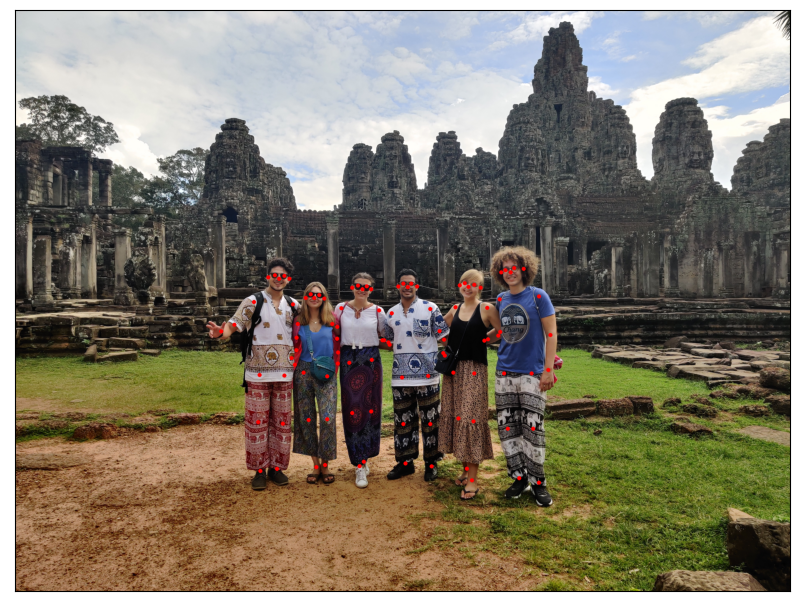

In [35]:
from torchvision.utils import draw_keypoints

res = draw_keypoints(goal_int, keypoints, colors='red', radius=10)

import torchvision.transforms.functional as F
plt.rcParams["savefig.bbox"] = 'tight'

def torch_show(imgs,figsize=(10,10)):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False,figsize=figsize)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

torch_show(res,figsize=(10,10))

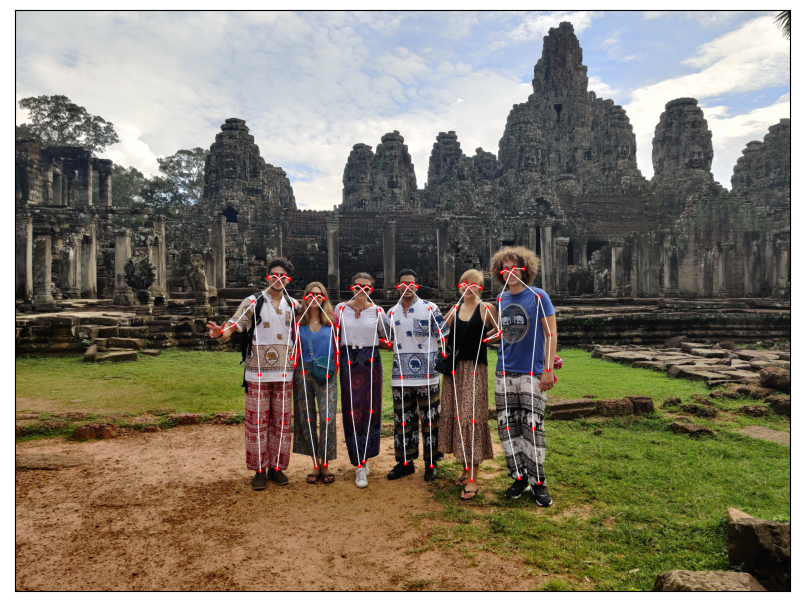

In [36]:
connect_skeleton = [
    (0, 1), (0, 2), (1, 3), (2, 4), (0, 5), (0, 6), (5, 7), (6, 8),
    (7, 9), (8, 10), (5, 11), (6, 12), (11, 13), (12, 14), (13, 15), (14, 16)
]
res = draw_keypoints(goal_int, keypoints, connectivity=connect_skeleton, colors="red", radius=10, width=5)
torch_show(res)